C:\Users\syafi\AppData\Local\Temp\ipykernel_20852\3612077230.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Fitting 5 folds for each of 54 candidates, totalling 270 fits

SVC:
Best parameters found: {'C': 0.1, 'kernel': 'linear'}
Best cross-validation score: 0.71
Accuracy: 0.75
Confusion Matrix:
 [[ 0 26]
 [ 0 79]]
F1 Score: 0.86
Precision: 0.75
Recall: 1.00
True Negatives (TN): 0
False Positives (FP): 26
False Negatives (FN): 0
True Positives (TP): 79
ROC curve is not applicable for this model.
Fitting 5 folds for each of 3 candidates, totalling 15 fits

Logistic Regression:
Best parameters found: {'C': 10, 'penalty': 'l2'}
Best cross-validation score: 0.71
Accuracy: 0.75
Confusion Matrix:
 [[ 0 26]
 [ 0 79]]
F1 Score: 0.86
Precision: 0.75
Recall: 1.00
True Negatives (TN): 0
False Positives (FP): 26
False Negatives (FN): 0
True Positives (TP): 79


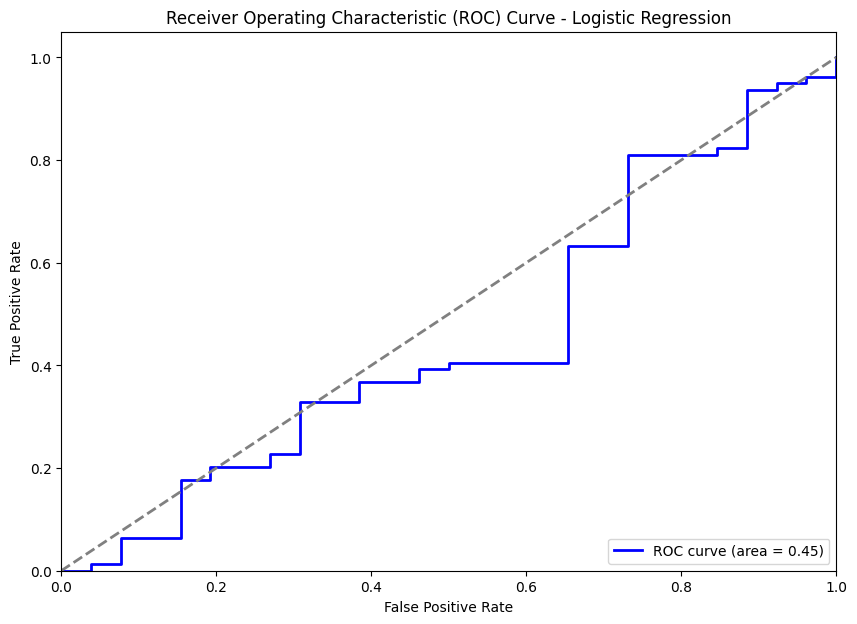

AUC Score: 0.45
Fitting 5 folds for each of 24 candidates, totalling 120 fits

Decision Tree:
Best parameters found: {'criterion': 'entropy', 'max_depth': 10, 'splitter': 'best'}
Best cross-validation score: 0.64
Accuracy: 0.74
Confusion Matrix:
 [[ 1 25]
 [ 2 77]]
F1 Score: 0.85
Precision: 0.75
Recall: 0.97
True Negatives (TN): 1
False Positives (FP): 25
False Negatives (FN): 2
True Positives (TP): 77


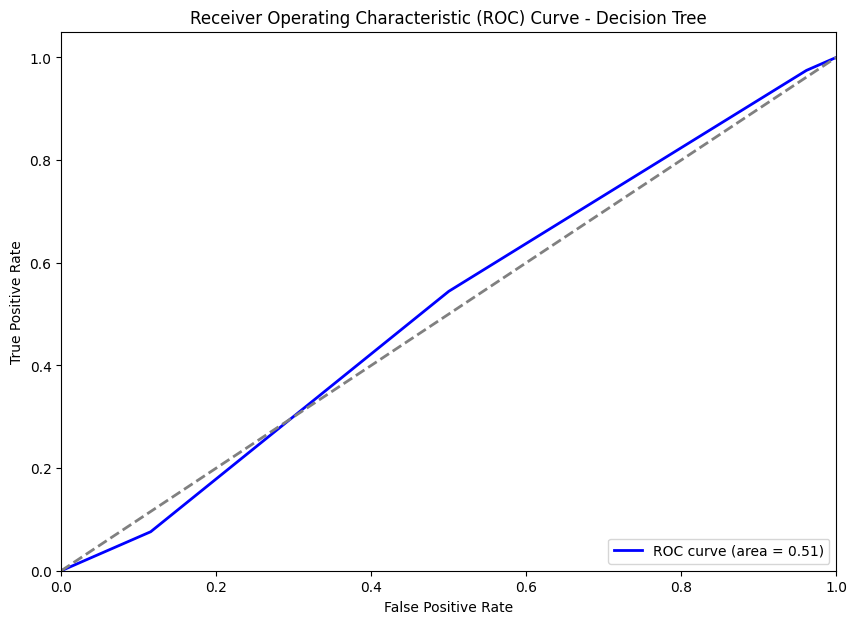

AUC Score: 0.51
Fitting 5 folds for each of 24 candidates, totalling 120 fits

Random Forest:
Best parameters found: {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 200}
Best cross-validation score: 0.67
Accuracy: 0.74
Confusion Matrix:
 [[ 2 24]
 [ 3 76]]
F1 Score: 0.85
Precision: 0.76
Recall: 0.96
True Negatives (TN): 2
False Positives (FP): 24
False Negatives (FN): 3
True Positives (TP): 76


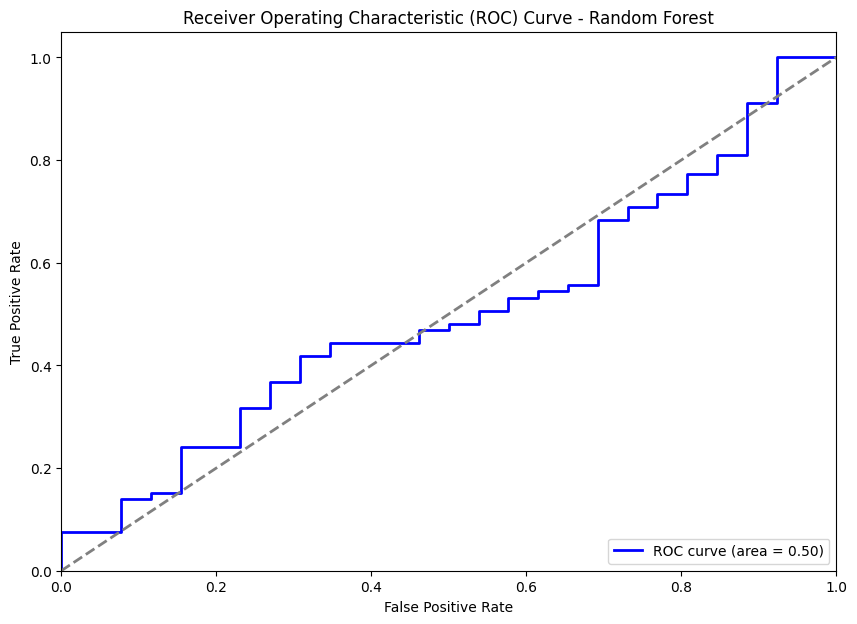

AUC Score: 0.50
Fitting 5 folds for each of 27 candidates, totalling 135 fits

Gradient Boosting:
Best parameters found: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 50}
Best cross-validation score: 0.70
Accuracy: 0.75
Confusion Matrix:
 [[ 1 25]
 [ 1 78]]
F1 Score: 0.86
Precision: 0.76
Recall: 0.99
True Negatives (TN): 1
False Positives (FP): 25
False Negatives (FN): 1
True Positives (TP): 78


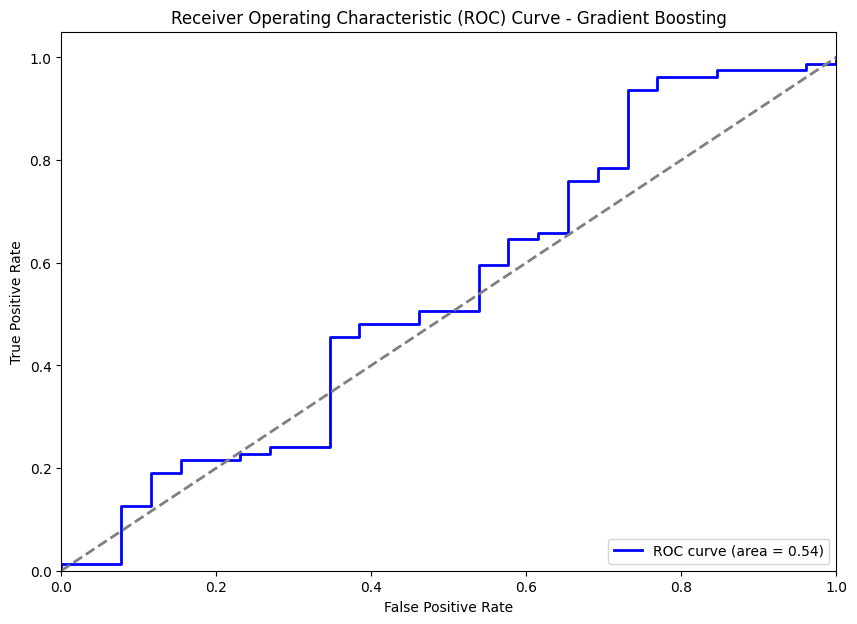

AUC Score: 0.54


Output()

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, roc_curve, auc
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler, MinMaxScaler
import ipywidgets as widgets
from IPython.display import display, clear_output
import joblib

# Load the dataset
data = pd.read_csv("credit.csv")

# Drop the unnecessary 'Index' column
data = data.drop('Index', axis=1)

# Drop rows with missing values
data = data.dropna()

# Encode categorical variables
LE = LabelEncoder()
categorical_columns = ['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']
for column in categorical_columns:
    data[column] = LE.fit_transform(data[column].astype(str))

# Define target variable and feature set
Y = data["Risk"]
X = data.drop('Risk', axis=1)

# Scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Save the scaler
joblib.dump(scaler, 'scaler.joblib')

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, train_size=0.8, random_state=42)

# Define classifiers and their parameter grids
classifiers = {
    'SVC': (SVC(), [
        {'kernel': ['linear'], 'C': [0.1, 1, 10]},
        {'kernel': ['poly'], 'C': [0.1, 1, 10], 'degree': [2, 3, 4], 'coef0': [0, 0.1, 1, 10]},
        {'kernel': ['rbf'], 'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1, 'scale', 'auto']}
    ]),
    'Logistic Regression': (LogisticRegression(max_iter=1000), [
        {'C': [0.1, 1, 10], 'penalty': ['l2']}
    ]),
    'Decision Tree': (DecisionTreeClassifier(), [
        {'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [None, 10, 20, 30, 40, 50]}
    ]),
    'Random Forest': (RandomForestClassifier(), [
        {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30], 'criterion': ['gini', 'entropy']}
    ]),
    'Gradient Boosting': (GradientBoostingClassifier(), [
        {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1], 'max_depth': [3, 5, 7]}
    ])
}

# Function to evaluate model performance
def evaluate_model(name, model, param_grid, X_train, Y_train, X_test, Y_test):
    grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, Y_train)

    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    Y_pred = grid_search.predict(X_test)

    accuracy = accuracy_score(Y_test, Y_pred)
    conf_matrix = confusion_matrix(Y_test, Y_pred)
    f1 = f1_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred)
    recall = recall_score(Y_test, Y_pred)

    # Print results
    print(f"\n{name}:")
    print(f"Best parameters found: {best_params}")
    print(f"Best cross-validation score: {best_score:.2f}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Confusion Matrix:\n {conf_matrix}")
    print(f"F1 Score: {f1:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")

    tn, fp, fn, tp = conf_matrix.ravel()
    print(f"True Negatives (TN): {tn}")
    print(f"False Positives (FP): {fp}")
    print(f"False Negatives (FN): {fn}")
    print(f"True Positives (TP): {tp}")

    # ROC curve
    if hasattr(grid_search, 'predict_proba'):
        Y_prob = grid_search.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(Y_test, Y_prob)
        roc_auc = auc(fpr, tpr)

        plt.figure(figsize=(10, 7))
        plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Receiver Operating Characteristic (ROC) Curve - {name}')
        plt.legend(loc="lower right")
        plt.show()

        print(f"AUC Score: {roc_auc:.2f}")
    else:
        print("ROC curve is not applicable for this model.")

    return grid_search.best_estimator_

# Evaluate all classifiers and save the best model
best_model = None
best_score = 0

for name, (model, param_grid) in classifiers.items():
    current_best_model = evaluate_model(name, model, param_grid, X_train, Y_train, X_test, Y_test)
    current_score = accuracy_score(Y_test, current_best_model.predict(X_test))
    if current_score > best_score:
        best_score = current_score
        best_model = current_best_model

# Save the best model
joblib.dump(best_model, 'best_model.joblib')

# Load the best model and scaler for prediction
best_model = joblib.load('best_model.joblib')
scaler = joblib.load('scaler.joblib')

# Define widget elements for user input
sex = widgets.Dropdown(options=[(label, idx) for idx, label in enumerate(LE.classes_)], description='Sex:')
job = widgets.IntSlider(value=0, min=0, max=3, step=1, description='Job:')
housing = widgets.Dropdown(options=[(label, idx) for idx, label in enumerate(LE.classes_)], description='Housing:')
saving_accounts = widgets.Dropdown(options=[(label, idx) for idx, label in enumerate(LE.classes_)], description='Saving Accounts:')
checking_account = widgets.Dropdown(options=[(label, idx) for idx, label in enumerate(LE.classes_)], description='Checking Account:')
purpose = widgets.Dropdown(options=[(label, idx) for idx, label in enumerate(LE.classes_)], description='Purpose:')
credit_amount = widgets.FloatText(description='Credit Amount:')
duration = widgets.IntText(description='Duration:')
age = widgets.IntText(description='Age:')
submit_button = widgets.Button(description='Predict')

# Display the widgets
input_widgets = widgets.VBox([
    sex, job, housing, saving_accounts, checking_account, purpose, credit_amount, duration, age, submit_button
])
display(input_widgets)

# Function to handle prediction
def predict_risk(button):
    user_data = pd.DataFrame({
        'Sex': [sex.value],
        'Job': [job.value],
        'Housing': [housing.value],
        'Saving accounts': [saving_accounts.value],
        'Checking account': [checking_account.value],
        'Purpose': [purpose.value],
        'Credit amount': [credit_amount.value],
        'Duration': [duration.value],
        'Age': [age.value]
    })

    user_data_scaled = scaler.transform(user_data)
    prediction = best_model.predict(user_data_scaled)
    result = 'Good' if prediction[0] == 1 else 'Bad'

    with output:
        clear_output()
        print(f"Predicted Risk: {result}")

# Attach the function to the button click event
output = widgets.Output()
submit_button.on_click(predict_risk)

# Display the output widget
display(output)
